In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('new_musicgenre_1.csv')
# df = pd.read_csv('new_musicgenre.csv')
#df=df.drop(['artist_name','track_name','mode','key'], axis=1)
df.dropna(inplace=True)

In [3]:
df

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,...,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99
0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.792000,A#,0.115,...,-0.041180,0.023055,-0.020235,0.082064,-0.012042,0.072162,0.001716,-0.032640,0.054636,-0.006389
1,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,0.124,...,-0.018570,0.030504,0.093514,-0.029809,-0.012060,0.002496,-0.011524,0.009218,0.012788,0.011020
2,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.011800,G#,0.534,...,-0.037355,-0.007792,0.083059,-0.024396,-0.014069,0.087334,-0.041177,-0.083655,0.021997,0.011469
3,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,0.157,...,-0.167277,0.021107,0.005731,0.207340,-0.040638,0.185526,-0.048944,-0.164129,0.165323,0.011491
4,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,0.157,...,-0.071376,0.012920,-0.027628,0.103787,-0.019260,0.077438,-0.003950,-0.049172,0.062553,0.010172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,Night Lovell,Barbie Doll,56.0,0.13300,0.849,237667.0,0.660,0.000008,C,0.296,...,0.008643,0.071619,0.109968,0.025808,-0.025982,0.093526,0.009251,0.003489,0.096029,-0.027477
49995,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.000000,C#,0.119,...,-0.021150,0.023719,0.055783,0.020882,-0.014703,0.053544,-0.021867,-0.019741,0.040093,-0.000076
49996,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.000000,B,0.109,...,0.037876,0.039147,0.044982,-0.020679,-0.007437,0.015603,0.009803,0.019179,0.017302,-0.021278
49997,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.000000,D,0.143,...,-0.017482,0.020349,0.009815,0.012514,-0.014960,0.034249,0.001139,0.000363,0.022368,0.005440


In [4]:
#remove the rows which duration<0
df = df[df['duration_ms'] >= 0]

#remove the nan value
df.replace("?", np.nan, inplace=True)

C:\Users\22848\AppData\Local\Temp\ipykernel_25760\587371546.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace("?", np.nan, inplace=True)


In [5]:
# X = df.drop(columns=["music_genre"], axis=1)
X = df.drop(columns=["music_genre","artist_name","track_name","key","mode"], axis=1)
y = df["music_genre"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
normalized_x_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [7]:
from skopt import BayesSearchCV
from sklearn.svm import SVC
from skopt.space import Real, Categorical, Integer

# Define the SVM model
svm = SVC(kernel='rbf',probability=True)

# Define the hyperparameters to tune
param_grid = {
    'C': Real(1e-2, 1e+3, prior='log-uniform'),
    'gamma': Real(1e-4, 1e+0, prior='log-uniform'),
}


# Define the Bayes Search Cross Validation with 5-fold cross validation
bayes_search = BayesSearchCV(svm, param_grid, cv=5, n_iter=50, n_jobs=-1)

# Fit the training data to the model
bayes_search.fit(normalized_x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters: ", bayes_search.best_params_)

# Predict the test data with the best hyperparameters
y_pred = bayes_search.predict(normalized_x_test)

# Evaluate the model performance
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Best Hyperparameters:  OrderedDict([('C', 70.86585772047499), ('gamma', 0.0003464826202920274)])
Accuracy: 86.49%


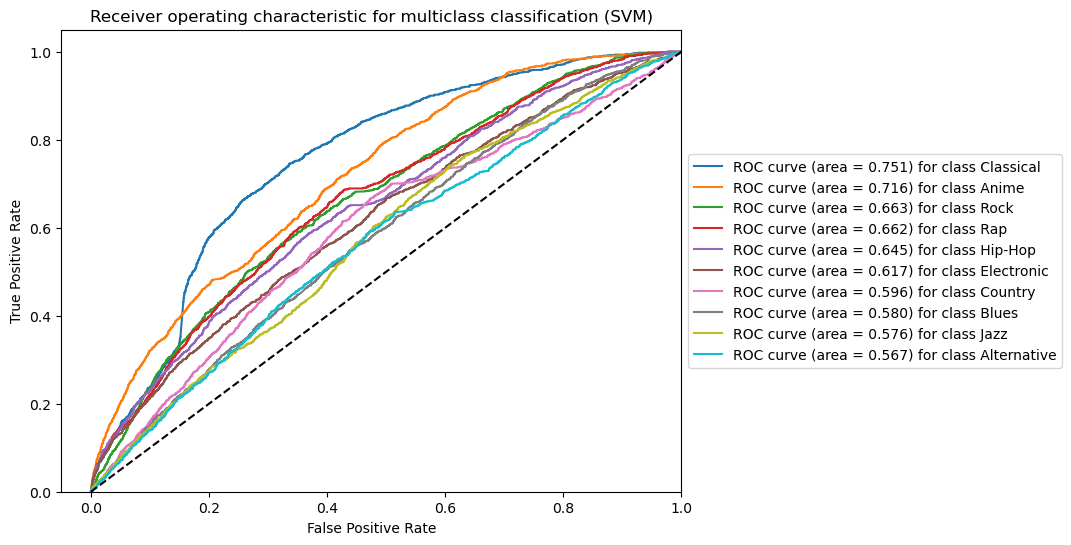

In [11]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

best_model = SVC(kernel='rbf',probability=True, C=70.86585772047499,gamma=0.0003464826202920274)
# Fit the model before predicting probabilities
best_model.fit(X_train, y_train)

# Predict probabilities for each class
y_proba = best_model.predict_proba(X_test)
n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()

label_binarizer = LabelBinarizer()
y_test_binary = label_binarizer.fit_transform(y_test)

for i in range(n_classes):
    y_proba_binary = y_proba[:, i]
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_proba_binary)
    roc_auc[i] = auc(fpr[i], tpr[i])

sorted_auc = sorted(roc_auc.items(), key=lambda x: x[1], reverse=True)

label_dict = {'0': 'Alternative', '1': 'Anime', '2': 'Blues', '3': 'Classical', '4': 'Country',
              '5': 'Electronic', '6': 'Hip-Hop', '7': 'Jazz', '8': 'Rap', '9': 'Rock'}

plt.figure(figsize=(8, 6))

for i, (class_index, auc_value) in enumerate(sorted_auc):
    label = 'ROC curve (area = %0.3f) for class %s' % (auc_value, label_dict[str(class_index)])
    plt.plot(fpr[class_index], tpr[class_index], label=label)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multiclass classification (SVM)')

handles, labels = plt.gca().get_legend_handles_labels()
sorted_legend_indices = [idx for idx, _ in sorted(enumerate(labels), key=lambda x: sorted_auc[x[0]][1])]
handles = [handles[i] for i in sorted_legend_indices]
labels = [labels[i] for i in sorted_legend_indices]
plt.legend(handles[::-1], labels[::-1], loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig("100d_svm.svg", format="svg", bbox_inches='tight')
plt.show()


In [12]:
from sklearn.metrics import classification_report
y_pred = best_model.predict(X_test)
# Generate a classification report
report = classification_report(y_test, y_pred, target_names=label_dict.values())

# Print the classification report
print(report)

              precision    recall  f1-score   support

 Alternative       0.12      0.14      0.13      1335
       Anime       0.28      0.23      0.25      1341
       Blues       0.13      0.12      0.12      1319
   Classical       0.33      0.36      0.34      1332
     Country       0.16      0.16      0.16      1352
  Electronic       0.18      0.19      0.18      1301
     Hip-Hop       0.13      0.13      0.13      1371
        Jazz       0.16      0.15      0.16      1350
         Rap       0.13      0.12      0.13      1329
        Rock       0.18      0.16      0.17      1355

    accuracy                           0.18     13385
   macro avg       0.18      0.18      0.18     13385
weighted avg       0.18      0.18      0.18     13385



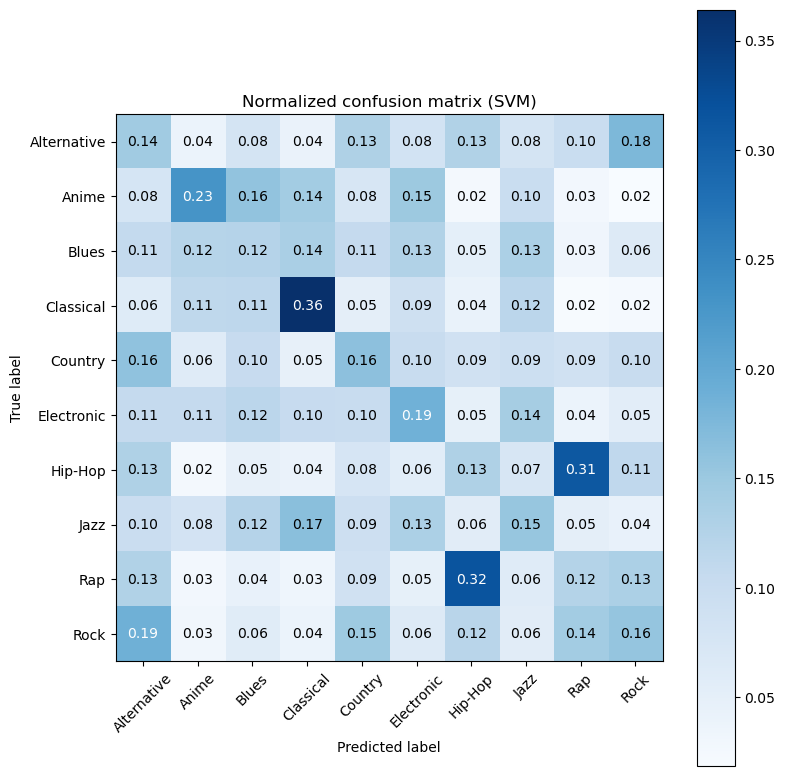

In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Define class names
classes = ['Alternative', 'Anime', 'Blues', 'Classical', 'Country',
           'Electronic', 'Hip-Hop', 'Jazz', 'Rap', 'Rock']

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm_norm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized confusion matrix (SVM)')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
fmt = '.2f'
thresh = cm_norm.max() / 2.
for i, j in np.ndindex(cm_norm.shape):
    plt.text(j, i, format(cm_norm[i, j], fmt),
             ha="center", va="center",
             color="white" if cm_norm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig("100d_svm_confusion_matrix.svg", format="svg", bbox_inches='tight')
plt.show()